In [311]:
from cpclasses import *
from importlib import reload

import GraphNeuralNetworks
reload(GraphNeuralNetworks)
from GraphNeuralNetworks import *

In [312]:
x = torch.tensor([[0], [3], [6], [4], [3]], dtype=torch.float)
edge_index = np.array([[0, 3],
                       [0, 4],
                       [1, 2],
                       [1, 3],
                       [2, 1],
                       [3, 1],
                       [3, 4],
                       [3, 0],
                       [4, 0],
                       [4, 3]])
edge_index = torch.tensor(edge_index.T, dtype=torch.long)


pos = torch.tensor([[5, 0], [3, 3], [0, 4], [4, 1.5], [6, 3.5]], dtype=torch.float)

graph = Data(x=x, edge_index=edge_index, pos=pos)

print(graph.pos)

tensor([[5.0000, 0.0000],
        [3.0000, 3.0000],
        [0.0000, 4.0000],
        [4.0000, 1.5000],
        [6.0000, 3.5000]])


In [313]:
pos = torch.rand(graph.num_nodes, 2)

print(pos)

torch.mean(pos, axis=0)

tensor([[0.5009, 0.7036],
        [0.8822, 0.3133],
        [0.8771, 0.7561],
        [0.8495, 0.4195],
        [0.9677, 0.6446]])


tensor([0.8155, 0.5674])

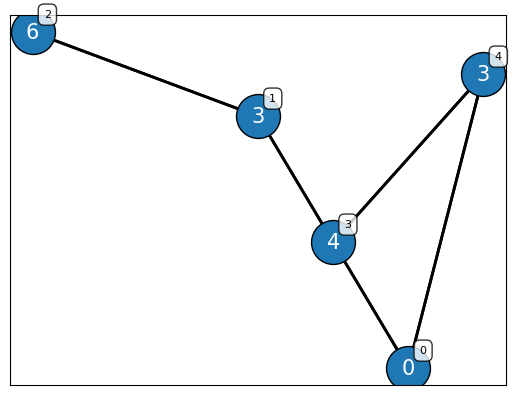

In [314]:
fig, ax = plt.subplots()

draw_graph(graph, ax)

In [315]:
class CustomMessagePassing(MessagePassing):

    def forward(self, x, edge_index):
        return self.propagate(edge_index, x=x)



In [316]:
gnn1_layer = CustomMessagePassing(aggr='add')
graph.x = gnn1_layer(graph.x, graph.edge_index)
print(gnn1_layer(graph.x, graph.edge_index))


tensor([[10.],
        [ 9.],
        [10.],
        [21.],
        [13.]])


In [317]:
x = torch.tensor([[0], [3], [6], [4], [3]], dtype=torch.float)
edge_index = np.array([[0, 3],
                       [0, 4],
                       [1, 2],
                       [1, 3],
                       [2, 1],
                       [3, 1],
                       [3, 4],
                       [3, 0],
                       [4, 0],
                       [4, 3],
                       [0, 0],
                       [1, 1],
                       [2, 2],
                       [3, 3],
                       [4, 4]])
edge_index = torch.tensor(edge_index.T, dtype=torch.long)


pos = torch.tensor([[5, 0], [3, 3], [0, 4], [4, 1.5], [6, 3.5]], dtype=torch.float)

graph = Data(x=x, edge_index=edge_index, pos=pos)

print(graph.pos)

tensor([[5.0000, 0.0000],
        [3.0000, 3.0000],
        [0.0000, 4.0000],
        [4.0000, 1.5000],
        [6.0000, 3.5000]])


In [318]:
pos = torch.rand(graph.num_nodes, 2)

print(pos)

torch.mean(pos, axis=0)

tensor([[0.8850, 0.8234],
        [0.1423, 0.5727],
        [0.0229, 0.8957],
        [0.2383, 0.4952],
        [0.0231, 0.0237]])


tensor([0.2623, 0.5621])

In [319]:
gnn1_layer = CustomMessagePassing(aggr='add')
graph.x = gnn1_layer(graph.x, graph.edge_index)
print(graph.x)
print(gnn1_layer(graph.x, graph.edge_index))


tensor([[ 7.],
        [13.],
        [ 9.],
        [10.],
        [ 7.]])
tensor([[24.],
        [32.],
        [22.],
        [37.],
        [24.]])


In [320]:
x = torch.tensor([[0], [3], [6], [4], [3]], dtype=torch.float)
edge_index = np.array([[0, 3],
                       [0, 4],
                       [1, 2],
                       [1, 3],
                       [2, 1],
                       [3, 1],
                       [3, 4],
                       [3, 0],
                       [4, 0],
                       [4, 3],
                       [0, 0],
                       [1, 1],
                       [2, 2],
                       [3, 3],
                       [4, 4]])
edge_index = torch.tensor(edge_index.T, dtype=torch.long)


pos = torch.tensor([[5, 0], [3, 3], [0, 4], [4, 1.5], [6, 3.5]], dtype=torch.float)

graph = Data(x=x, edge_index=edge_index, pos=pos)

print(graph.pos)

tensor([[5.0000, 0.0000],
        [3.0000, 3.0000],
        [0.0000, 4.0000],
        [4.0000, 1.5000],
        [6.0000, 3.5000]])


In [321]:
class CustomMessagePassing(MessagePassing):

    def forward(self, x, edge_index):
        return self.propagate(edge_index, x=x)

gnn_max_layer = CustomMessagePassing(aggr='max')

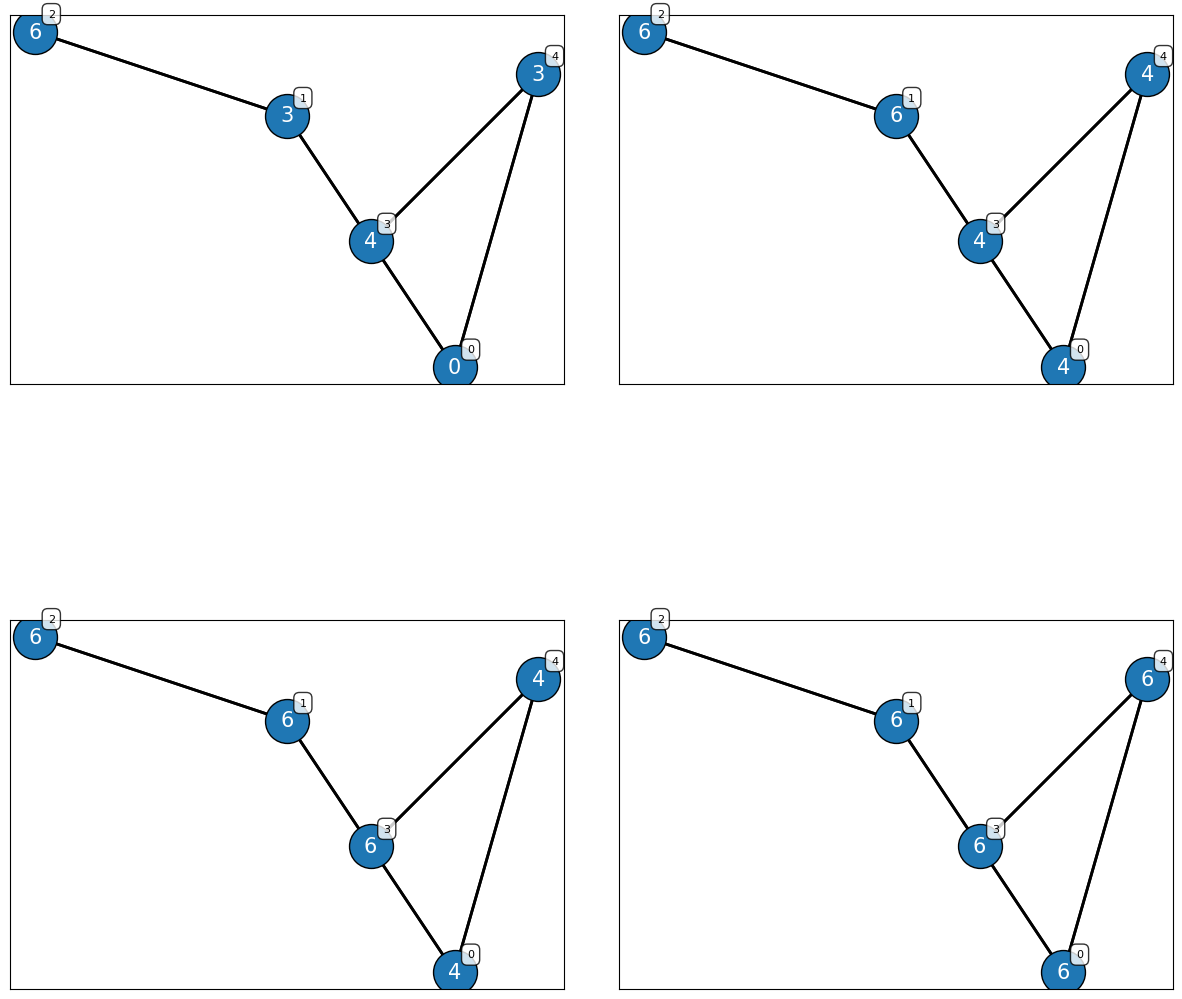

In [322]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15), gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

for ax in axs.flatten():
    draw_graph(graph, ax)
    graph.x = gnn_max_layer(graph.x, graph.edge_index)
    ax.set_aspect('equal')
